## 範例重點
* 學習如何在 keras 中加入 reduce learning rate
* 知道如何設定 reduce_lr 的監控目標
* 比較使用有無使用 reduce_lr 時的 performance

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [8]:
"""
# 載入 Callbacks, 並設定監控目標為 validation loss
"""
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(factor=0.5, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=5, 
                              verbose=1)

In [9]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[reduce_lr]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

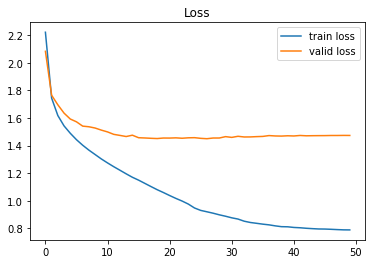

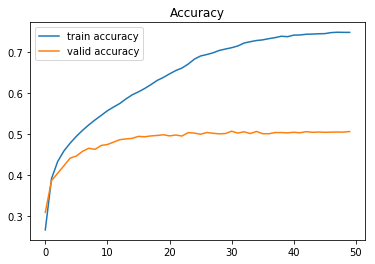

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.2,0.5,0.8]
redice_lr_patient = [0.2,0.5,0.8]

In [8]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """

    reduce_lr = ReduceLROnPlateau(factor=0.5, 
                                  min_lr=1e-12, 
                                  monitor='val_loss', 
                                  patience=5, 
                                  verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

W0802 22:55:27.412342  8824 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0802 22:55:27.414820  8824 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 22:55:27.437126  8824 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Numbers of exp: 0, reduce_factor: 0.20, reduce_patient: 0


W0802 22:55:27.670502  8824 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0802 22:55:27.842043  8824 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0802 22:55:27.861990  8824 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0802 22:55:27.978678  8824 deprecation.py:323] From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.whe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,642,890
Trainable params: 1,641,610
Non-trainable params: 1,280
______________________________________________________________

50000/50000 [==============================] - 7s 137us/step - loss: 1.2283 - acc: 0.5748 - val_loss: 1.4662 - val_acc: 0.4800
Epoch 18/25
50000/50000 [==============================] - 7s 138us/step - loss: 1.2091 - acc: 0.5826 - val_loss: 1.4542 - val_acc: 0.4857
Epoch 19/25
50000/50000 [==============================] - 7s 139us/step - loss: 1.1931 - acc: 0.5882 - val_loss: 1.4447 - val_acc: 0.4937
Epoch 20/25
50000/50000 [==============================] - 7s 140us/step - loss: 1.1748 - acc: 0.5942 - val_loss: 1.4420 - val_acc: 0.4897
Epoch 21/25
50000/50000 [==============================] - 7s 139us/step - loss: 1.1584 - acc: 0.6020 - val_loss: 1.4365 - val_acc: 0.4954
Epoch 22/25
50000/50000 [==============================] - 7s 140us/step - loss: 1.1429 - acc: 0.6065 - val_loss: 1.4246 - val_acc: 0.4965
Epoch 23/25
50000/50000 [==============================] - 6s 128us/step - loss: 1.1273 - acc: 0.6127 - val_loss: 1.4417 - val_acc: 0.4923
Epoch 24/25
50000/50000 [==============

50000/50000 [==============================] - 8s 164us/step - loss: 1.4273 - acc: 0.5033 - val_loss: 1.5166 - val_acc: 0.4682
Epoch 9/25
50000/50000 [==============================] - 8s 166us/step - loss: 1.4022 - acc: 0.5112 - val_loss: 1.5155 - val_acc: 0.4660
Epoch 10/25
50000/50000 [==============================] - 8s 166us/step - loss: 1.3758 - acc: 0.5219 - val_loss: 1.5001 - val_acc: 0.4730
Epoch 11/25
50000/50000 [==============================] - 8s 165us/step - loss: 1.3528 - acc: 0.5310 - val_loss: 1.4895 - val_acc: 0.4747
Epoch 12/25
50000/50000 [==============================] - 9s 175us/step - loss: 1.3307 - acc: 0.5382 - val_loss: 1.4799 - val_acc: 0.4730
Epoch 13/25
50000/50000 [==============================] - 9s 188us/step - loss: 1.3112 - acc: 0.5438 - val_loss: 1.4645 - val_acc: 0.4890
Epoch 14/25
50000/50000 [==============================] - 9s 186us/step - loss: 1.2894 - acc: 0.5533 - val_loss: 1.4600 - val_acc: 0.4837
Epoch 15/25
50000/50000 [===============

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 12s 243us/step - loss: 2.1752 - acc: 0.2713 - val_loss: 2.0616 - val_acc: 0.3346
Epoch 2/25
50000/50000 [==============================] - 11s 225us/step - loss: 1.7366 - acc: 0.3924 - val_loss: 1.7997 - val_acc: 0.3728
Epoch 3/25
50000/50000 [==============================] - 11s 212us/step - loss: 1.6301 - acc: 0.4272 - val_loss: 1.6929 - val_acc: 0.4058
Epoch 4/25
50000/50000 [==============================] - 10s 204us/step - loss: 1.5691 - acc: 0.4523 - val_loss: 1.6321 - val_acc: 0.4267
Epoch 5/25
50000/50000 [==============================] - 12s 234us/step - loss: 1.5234 - acc: 0.4689 - val_loss: 1.6061 - val_acc: 0.4400
Epoch 6/25
50000/50000 [==============================] - 11s 210us/step - loss: 1.4844 - acc: 0.4825 - val_loss: 1.5852 - val_acc: 0.4411
Epoch 7/25
50000/50000 [==============================] - 11s 216us/step - loss: 1.4504 - acc: 0.4936 - val_loss: 1.

50000/50000 [==============================] - 11s 213us/step - loss: 1.1153 - acc: 0.6225 - val_loss: 1.4376 - val_acc: 0.4950
Numbers of exp: 7, reduce_factor: 0.80, reduce_patient: 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_15 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
batch_normalization_16 (Batc (None, 128)               512       
_________________________________________________________________
output (Dense)        

50000/50000 [==============================] - 8s 160us/step - loss: 1.2439 - acc: 0.5694 - val_loss: 1.4526 - val_acc: 0.4898
Epoch 17/25
50000/50000 [==============================] - 8s 163us/step - loss: 1.2237 - acc: 0.5758 - val_loss: 1.4415 - val_acc: 0.4986
Epoch 18/25
50000/50000 [==============================] - 8s 161us/step - loss: 1.2073 - acc: 0.5830 - val_loss: 1.4395 - val_acc: 0.5004
Epoch 19/25
50000/50000 [==============================] - 9s 171us/step - loss: 1.1889 - acc: 0.5903 - val_loss: 1.4344 - val_acc: 0.4981
Epoch 20/25
50000/50000 [==============================] - 8s 168us/step - loss: 1.1707 - acc: 0.5971 - val_loss: 1.4232 - val_acc: 0.4996
Epoch 21/25
50000/50000 [==============================] - 8s 152us/step - loss: 1.1562 - acc: 0.6037 - val_loss: 1.4235 - val_acc: 0.5039
Epoch 22/25
50000/50000 [==============================] - 8s 153us/step - loss: 1.1384 - acc: 0.6082 - val_loss: 1.4363 - val_acc: 0.5002
Epoch 23/25
50000/50000 [==============

50000/50000 [==============================] - 8s 159us/step - loss: 1.2983 - acc: 0.5477 - val_loss: 1.5159 - val_acc: 0.4615
Epoch 7/25
50000/50000 [==============================] - 8s 156us/step - loss: 1.2585 - acc: 0.5627 - val_loss: 1.5843 - val_acc: 0.4396
Epoch 8/25
50000/50000 [==============================] - 8s 165us/step - loss: 1.2273 - acc: 0.5760 - val_loss: 1.5409 - val_acc: 0.4525
Epoch 9/25
50000/50000 [==============================] - 9s 171us/step - loss: 1.1910 - acc: 0.5873 - val_loss: 1.4509 - val_acc: 0.4840
Epoch 10/25
50000/50000 [==============================] - 9s 170us/step - loss: 1.1606 - acc: 0.5984 - val_loss: 1.4797 - val_acc: 0.4692
Epoch 11/25
50000/50000 [==============================] - 9s 177us/step - loss: 1.1288 - acc: 0.6111 - val_loss: 1.4594 - val_acc: 0.4831
Epoch 12/25
50000/50000 [==============================] - 9s 171us/step - loss: 1.1047 - acc: 0.6183 - val_loss: 1.5259 - val_acc: 0.4636
Epoch 13/25
50000/50000 [=================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 11s 220us/step - loss: 1.8715 - acc: 0.3598 - val_loss: 1.8476 - val_acc: 0.3671
Epoch 2/25
50000/50000 [==============================] - 9s 179us/step - loss: 1.5780 - acc: 0.4510 - val_loss: 1.6783 - val_acc: 0.4162
Epoch 3/25
50000/50000 [==============================] - 9s 189us/step - loss: 1.5023 - acc: 0.4773 - val_loss: 1.6023 - val_acc: 0.4389
Epoch 4/25
50000/50000 [==============================] - 9s 182us/step - loss: 1.4546 - acc: 0.4932 - val_loss: 1.5657 - val_acc: 0.4544
Epoch 5/25
50000/50000 [==============================] - 9s 178us/step - loss: 1.4119 - acc: 0.5105 - val_loss: 1.5561 - val_acc: 0.4522
Epoch 6/25
50000/50000 [==============================] - 8s 167us/step - loss: 1.3776 - acc: 0.5221 - val_loss: 1.5512 - val_acc: 0.4581
Epoch 7/25
50000/50000 [==============================] - 9s 177us/step - loss: 1.3487 - acc: 0.5328 - val_loss: 1.5301 -

50000/50000 [==============================] - 11s 220us/step - loss: 1.0429 - acc: 0.6534 - val_loss: 1.4052 - val_acc: 0.5049
Numbers of exp: 14, reduce_factor: 0.50, reduce_patient: 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_29 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
batch_normalization_30 (Batc (None, 128)               512       
_________________________________________________________________
output (Dense)       

Epoch 16/25
50000/50000 [==============================] - 10s 196us/step - loss: 1.2933 - acc: 0.5560 - val_loss: 1.4735 - val_acc: 0.4798
Epoch 17/25
50000/50000 [==============================] - 10s 197us/step - loss: 1.2803 - acc: 0.5590 - val_loss: 1.4691 - val_acc: 0.4795
Epoch 18/25
50000/50000 [==============================] - 10s 200us/step - loss: 1.2702 - acc: 0.5644 - val_loss: 1.4611 - val_acc: 0.4849
Epoch 19/25
50000/50000 [==============================] - 10s 209us/step - loss: 1.2610 - acc: 0.5675 - val_loss: 1.4642 - val_acc: 0.4833
Epoch 20/25
50000/50000 [==============================] - 11s 223us/step - loss: 1.2497 - acc: 0.5722 - val_loss: 1.4714 - val_acc: 0.4812
Epoch 21/25
50000/50000 [==============================] - 11s 218us/step - loss: 1.2403 - acc: 0.5751 - val_loss: 1.4650 - val_acc: 0.4839
Epoch 22/25
50000/50000 [==============================] - 11s 220us/step - loss: 1.2305 - acc: 0.5808 - val_loss: 1.4520 - val_acc: 0.4870
Epoch 23/25
50000/50

Epoch 7/25
50000/50000 [==============================] - 10s 207us/step - loss: 1.4376 - acc: 0.5009 - val_loss: 1.5640 - val_acc: 0.4471
Epoch 8/25
50000/50000 [==============================] - 10s 205us/step - loss: 1.4168 - acc: 0.5087 - val_loss: 1.5514 - val_acc: 0.4539
Epoch 9/25
50000/50000 [==============================] - 9s 189us/step - loss: 1.3969 - acc: 0.5160 - val_loss: 1.5255 - val_acc: 0.4616
Epoch 10/25
50000/50000 [==============================] - 9s 185us/step - loss: 1.3787 - acc: 0.5217 - val_loss: 1.5141 - val_acc: 0.4708
Epoch 11/25
50000/50000 [==============================] - 9s 183us/step - loss: 1.3625 - acc: 0.5271 - val_loss: 1.5143 - val_acc: 0.4662
Epoch 12/25
50000/50000 [==============================] - 9s 182us/step - loss: 1.3471 - acc: 0.5346 - val_loss: 1.4973 - val_acc: 0.4714
Epoch 13/25
50000/50000 [==============================] - 9s 182us/step - loss: 1.3330 - acc: 0.5390 - val_loss: 1.4993 - val_acc: 0.4703
Epoch 14/25
50000/50000 [===

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 10s 208us/step - loss: 1.8173 - acc: 0.3735 - val_loss: 2.0087 - val_acc: 0.3230
Epoch 2/25
50000/50000 [==============================] - 8s 166us/step - loss: 1.5729 - acc: 0.4505 - val_loss: 2.5253 - val_acc: 0.2482
Epoch 3/25
50000/50000 [==============================] - 8s 166us/step - loss: 1.4844 - acc: 0.4831 - val_loss: 2.0593 - val_acc: 0.3183
Epoch 4/25
50000/50000 [==============================] - 8s 169us/step - loss: 1.4278 - acc: 0.5045 - val_loss: 1.8872 - val_acc: 0.3528
Epoch 5/25
50000/50000 [==============================] - 9s 181us/step - loss: 1.3780 - acc: 0.5231 - val_loss: 1.8375 - val_acc: 0.3673
Epoch 6/25
50000/50000 [==============================] - 9s 181us/step - loss: 1.3422 - acc: 0.5347 - val_loss: 2.0308 - val_acc: 0.3316
Epoch 7/25
50000/50000 [==============================] - 10s 191us/step - loss: 1.3026 - acc: 0.5482 - val_loss: 1.9083 

50000/50000 [==============================] - 9s 174us/step - loss: 0.9073 - acc: 0.7027 - val_loss: 1.5600 - val_acc: 0.4692
Epoch 25/25
50000/50000 [==============================] - 9s 173us/step - loss: 0.8938 - acc: 0.7076 - val_loss: 1.4443 - val_acc: 0.5096
Numbers of exp: 21, reduce_factor: 0.50, reduce_patient: 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_43 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
batch_normaliza

50000/50000 [==============================] - 8s 169us/step - loss: 1.1763 - acc: 0.5998 - val_loss: 1.5256 - val_acc: 0.4774
Epoch 16/25
50000/50000 [==============================] - 8s 169us/step - loss: 1.1543 - acc: 0.6082 - val_loss: 1.5223 - val_acc: 0.4673

Epoch 00016: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 17/25
50000/50000 [==============================] - 8s 169us/step - loss: 1.1135 - acc: 0.6266 - val_loss: 1.4421 - val_acc: 0.4940
Epoch 18/25
50000/50000 [==============================] - 9s 180us/step - loss: 1.1012 - acc: 0.6323 - val_loss: 1.4430 - val_acc: 0.4958
Epoch 19/25
50000/50000 [==============================] - 9s 187us/step - loss: 1.0892 - acc: 0.6370 - val_loss: 1.4291 - val_acc: 0.50433s - loss:
Epoch 20/25
50000/50000 [==============================] - 9s 187us/step - loss: 1.0779 - acc: 0.6414 - val_loss: 1.4567 - val_acc: 0.4945
Epoch 21/25
50000/50000 [==============================] - 10s 197us/step - loss: 1.067

Epoch 5/25
50000/50000 [==============================] - 8s 169us/step - loss: 1.6884 - acc: 0.4113 - val_loss: 1.7507 - val_acc: 0.3944
Epoch 6/25
50000/50000 [==============================] - 8s 168us/step - loss: 1.6455 - acc: 0.4256 - val_loss: 1.7047 - val_acc: 0.4089
Epoch 7/25
50000/50000 [==============================] - 9s 177us/step - loss: 1.6105 - acc: 0.4393 - val_loss: 1.6799 - val_acc: 0.4179
Epoch 8/25
50000/50000 [==============================] - 10s 191us/step - loss: 1.5797 - acc: 0.4496 - val_loss: 1.6548 - val_acc: 0.4231
Epoch 9/25
50000/50000 [==============================] - 10s 191us/step - loss: 1.5550 - acc: 0.4593 - val_loss: 1.6400 - val_acc: 0.4306
Epoch 10/25
50000/50000 [==============================] - 10s 195us/step - loss: 1.5316 - acc: 0.4673 - val_loss: 1.6160 - val_acc: 0.4364
Epoch 11/25
50000/50000 [==============================] - 10s 191us/step - loss: 1.5103 - acc: 0.4741 - val_loss: 1.6117 - val_acc: 0.4358
Epoch 12/25
50000/50000 [===

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 12s 235us/step - loss: 2.2867 - acc: 0.2421 - val_loss: 2.1514 - val_acc: 0.2888
Epoch 2/25
50000/50000 [==============================] - 9s 182us/step - loss: 1.9540 - acc: 0.3293 - val_loss: 1.9608 - val_acc: 0.3390
Epoch 3/25
50000/50000 [==============================] - 9s 175us/step - loss: 1.8265 - acc: 0.3672 - val_loss: 1.8659 - val_acc: 0.3604
Epoch 4/25
50000/50000 [==============================] - 9s 174us/step - loss: 1.7520 - acc: 0.3906 - val_loss: 1.7895 - val_acc: 0.3830
Epoch 5/25
50000/50000 [==============================] - 9s 175us/step - loss: 1.6967 - acc: 0.4096 - val_loss: 1.7463 - val_acc: 0.3914
Epoch 6/25
50000/50000 [==============================] - 9s 175us/step - loss: 1.6557 - acc: 0.4232 - val_loss: 1.7140 - val_acc: 0.4030
Epoch 7/25
50000/50000 [==============================] - 9s 175us/step - loss: 1.6205 - acc: 0.4373 - val_loss: 1.6784 -

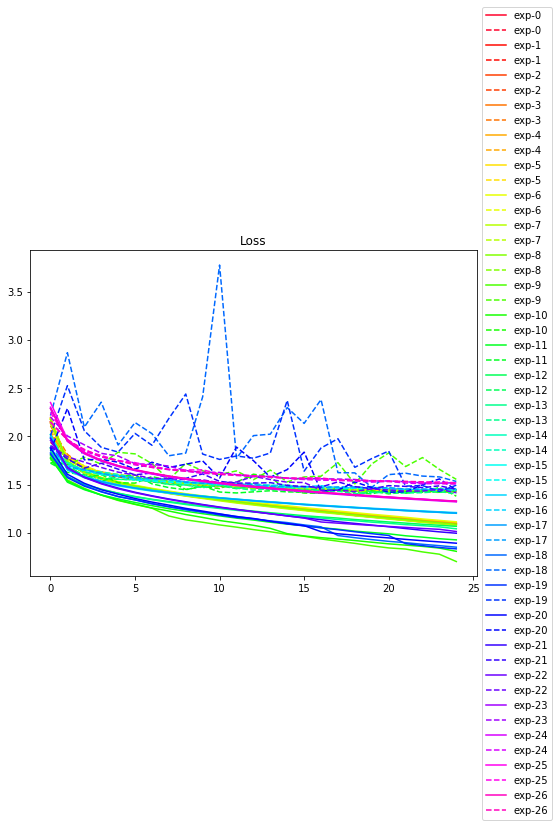

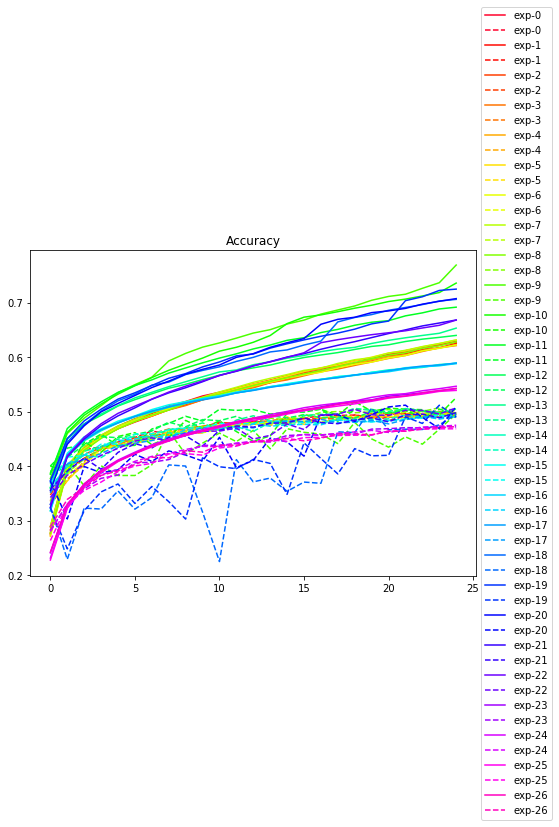

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()